## ข้อ 1

In [295]:
from sklearn.datasets import load_iris
data=load_iris()
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [296]:
print(data.data.shape)

(150, 4)


## ข้อ 2

In [297]:
from sklearn.preprocessing import OneHotEncoder
print(data.target_names)

['setosa' 'versicolor' 'virginica']


## ข้อ 3

In [298]:
encoder=OneHotEncoder(sparse_output=False)
y=data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [299]:
encoder= encoder.fit_transform(y.reshape(-1,1))
y=encoder
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [300]:
print(y.shape)

(150, 3)


## ข้อ 4

In [301]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(data.data,y,test_size=0.25,random_state=42)

## ข้อ 5

In [302]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.005,solver='sgd',activation='logistic', max_iter=1000)
MLP.fit(xTrain, yTrain)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,),
              learning_rate_init=0.005, max_iter=1000, solver='sgd')

## ข้อ 6

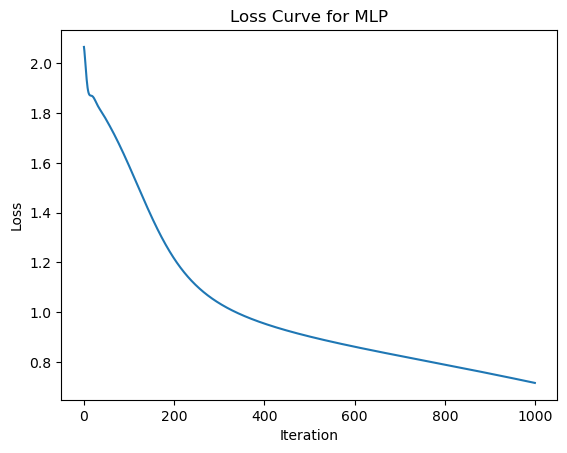

In [303]:
import matplotlib.pyplot as plt

loss_values =MLP.loss_curve_

plt.plot(loss_values)
plt.title('Loss Curve for MLP')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [304]:
MLP.loss_

0.7168354833307388

## ข้อ 7

In [305]:
print("acc:", MLP.score(xTest, yTest))

acc: 0.7105263157894737


## ข้อ 8

In [306]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()

In [307]:
parameter={'hidden_layer_sizes': [(5,),(20,),(5,5),(5,20),(5,20,5)],
           'activation': ['logistic','relu'],
           'solver': ['sgd','adam'],
           'learning_rate_init': [0.0001,0.001,0.005]}

In [311]:
grid = GridSearchCV(MLP, parameter, cv=3)
grid.fit(xTrain, yTrain)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_m

GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(50,),
                                     learning_rate_init=0.005, max_iter=1000,
                                     solver='sgd'),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(5,), (20,), (5, 5), (5, 20),
                                                (5, 20, 5)],
                         'learning_rate_init': [0.0001, 0.001, 0.005],
                         'solver': ['sgd', 'adam']})

In [312]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (5, 20), 'learning_rate_init': 0.001, 'solver': 'adam'}


## ข้อ 9

In [313]:
print("acc:", grid.score(xTest, yTest))

acc: 0.9210526315789473


## ข้อ 10

In [317]:
weights_input_to_hidden1 = grid.coefs_[0]

AttributeError: 'GridSearchCV' object has no attribute 'coefs_'

## ข้อ 11

## ข้อ 12

## ข้อ 13

## ข้อ 14

## ข้อ 15

## ข้อ 16

## ข้อ 17

## ข้อ 18

## ข้อ 19